# Doing some exploration on the data

In [43]:
import pandas as pd

# Load the json file
data = pd.read_json('recipies.json')
data.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


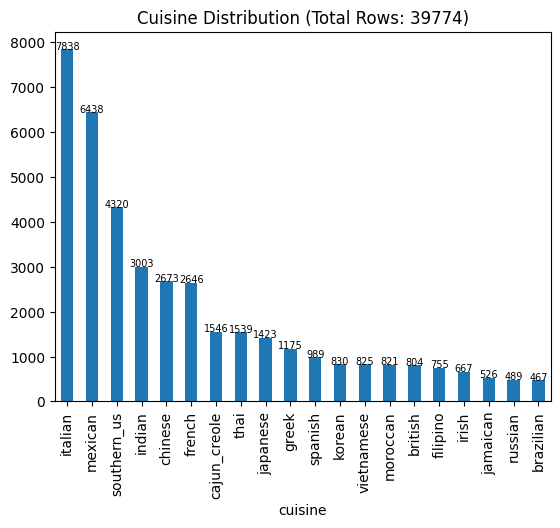

In [44]:
import matplotlib.pyplot as plt

#printing a histogram of cuisines
data['cuisine'].value_counts().plot(kind='bar')

plt.title(f'Cuisine Distribution (Total Rows: {len(data)})')
# Add text labels at the top of each bar
for i, v in enumerate(data['cuisine'].value_counts()):
    plt.text(i, v + 0.1, str(v), ha='center', fontsize=7)

plt.show()

In [45]:
print('The total number of instances in the dataset is:', len(data))
print('\nThe number of cuisines in the dataset is:', len(data['cuisine'].unique()))
print('\nTable illustrating each cuisine type and number:\n\n', data['cuisine'].value_counts().reset_index(name='number_of_recipes'))

The total number of instances in the dataset is: 39774

The number of cuisines in the dataset is: 20

Table illustrating each cuisine type and number:

          cuisine  number_of_recipes
0        italian               7838
1        mexican               6438
2    southern_us               4320
3         indian               3003
4        chinese               2673
5         french               2646
6   cajun_creole               1546
7           thai               1539
8       japanese               1423
9          greek               1175
10       spanish                989
11        korean                830
12    vietnamese                825
13      moroccan                821
14       british                804
15      filipino                755
16         irish                667
17      jamaican                526
18       russian                489
19     brazilian                467


# Creating the APP

In [130]:
from apyori import apriori, load_transactions
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

cusine_type = ""

while cusine_type != "exit":
    cusine_type = input('Enter a Cuisine type: (type "exit" to quit)')
    if cusine_type in data['cuisine'].unique():
        # Selecting the dataframe with the selected cuisine type
        selected_cuisine_df = data[data['cuisine']==cusine_type]['ingredients']

        # Converting the recipes into a matrix of ingredients
        te = TransactionEncoder()
        te_ary = te.fit(selected_cuisine_df).transform(selected_cuisine_df)
        df = pd.DataFrame(te_ary, columns=te.columns_)

        # Applying the apriori algorithm to get the frequent ingredient sets
        min_support = 100/len(selected_cuisine_df)
        frequent_recipes = apriori(df, min_support=min_support,use_colnames=True)
        
        # Applying the association rules to get the top group of ingredients
        rules = association_rules(frequent_recipes, metric="confidence", min_threshold=0.5)
        first_row = rules.iloc[0]
        antecedents = list(first_row['antecedents'])
        consequents = list(first_row['consequents'])
        print("The top group of ingredients are:", antecedents[0], "and", consequents[0])

        # Applying the association rules to get the top group of ingredients with lift > 2
        rules_lift = rules[rules['lift'] > 2][['antecedents', 'consequents', 'lift']]
        print("\nRules with lift > 2: \n",rules_lift)


    else:
        print("We don't have recommentations for {}".format(cusine_type))

The top group of ingredients are: cucumber and salt

Rules with lift > 2: 
 Empty DataFrame
Columns: [antecedents, consequents, lift]
Index: []
The top group of ingredients are: onions and salt

Rules with lift > 2: 
 Empty DataFrame
Columns: [antecedents, consequents, lift]
Index: []
The top group of ingredients are: large eggs and all-purpose flour

Rules with lift > 2: 
                              antecedents          consequents      lift
0                           (large eggs)  (all-purpose flour)  2.311668
8                      (large egg yolks)              (sugar)  2.619543
17                     (vanilla extract)              (sugar)  2.503688
20                    (salt, large eggs)  (all-purpose flour)  2.735994
21            (all-purpose flour, sugar)         (large eggs)  3.606280
22       (all-purpose flour, large eggs)              (sugar)  2.415027
23                   (sugar, large eggs)  (all-purpose flour)  2.720767
24       (all-purpose flour, large eggs)    (un

In [69]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
selected_cuisine = "greek"
selected_cuisine_df = data[data['cuisine']==selected_cuisine]['ingredients']
selected_cuisine_df
#apriori(selected_cuisine_df, min_support=100/len(selected_cuisine_df), use_colnames=True)

0        [romaine lettuce, black olives, grape tomatoes...
93       [ground pork, finely chopped fresh parsley, on...
103      [minced garlic, dried oregano, red wine vinega...
153      [orange, anise, cinnamon sticks, unflavored ge...
186      [fresh dill, yoghurt, salt, myzithra, large eg...
                               ...                        
39709    [dried basil, zucchini, purple onion, ground c...
39714    [rocket leaves, sun-dried tomatoes, yellow bel...
39744    [extra-virgin olive oil, oregano, potatoes, ga...
39757    [red bell pepper, garlic cloves, extra-virgin ...
39758    [milk, salt, ground cayenne pepper, ground lam...
Name: ingredients, Length: 1175, dtype: object

In [77]:
te = TransactionEncoder()
te_ary = te.fit(selected_cuisine_df).transform(selected_cuisine_df)
df = pd.DataFrame(te_ary, columns=te.columns_)
df


,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",1% low-fat milk,2% low-fat cottage cheese,2% lowfat greek yogurt,2% reduced-fat milk,Balsamico Bianco,Betty Crocker™ oatmeal cookie mix,California bay leaves,Cavenders Greek Seasoning,Cholula Hot Sauce,...,yellow split peas,yellow squash,yoghurt,yogurt low fat,yukon gold potatoes,zest,zesty italian dressing,zinfandel,ziti,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1171,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1172,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1173,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [88]:
min_support=100/len(df)
min_support

0.0851063829787234

In [89]:
frequent_recipes = apriori(df, min_support=min_support,use_colnames=True)
frequent_recipes

,support,itemsets
0,0.085106,(all-purpose flour)
1,0.159149,(cucumber)
2,0.226383,(dried oregano)
3,0.194894,(extra-virgin olive oil)
4,0.162553,(feta cheese)
5,0.214468,(feta cheese crumbles)
6,0.091915,(fresh dill)
7,0.188936,(fresh lemon juice)
8,0.096170,(fresh parsley)
9,0.183830,(garlic)


In [119]:

rules = association_rules(frequent_recipes, metric="confidence", min_threshold=0.5)
first_row = rules.iloc[0]
antecedents = list(first_row['antecedents'])
consequents = list(first_row['consequents'])
print("The top group of ingredients are:", antecedents[0], "and", consequents[0])

The top group of ingredients are: cucumber and salt


In [128]:
rules_lift = rules[rules['lift'] > 1][['antecedents', 'consequents', 'lift']]
print("\nRules with lift > 2: \n",rules_lift)


Rules with lift > 2: 
               antecedents  consequents      lift
0              (cucumber)       (salt)  1.111428
1         (dried oregano)  (olive oil)  1.361194
2         (dried oregano)       (salt)  1.168146
3           (feta cheese)  (olive oil)  1.247489
4                (garlic)  (olive oil)  1.459990
5                (garlic)       (salt)  1.171799
6         (garlic cloves)       (salt)  1.244436
7   (ground black pepper)       (salt)  1.290798
8           (lemon juice)  (olive oil)  1.360518
9           (lemon juice)       (salt)  1.277641
10               (onions)  (olive oil)  1.426844
11               (pepper)  (olive oil)  1.231282
12            (olive oil)       (salt)  1.104581
13               (onions)       (salt)  1.123444
14               (pepper)       (salt)  1.733412


In [120]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(cucumber),(salt),0.159149,0.485957,0.085957,0.540107,1.111428,0.008618,1.117744,0.119233
1,(dried oregano),(olive oil),0.226383,0.428085,0.131915,0.582707,1.361194,0.035004,1.370535,0.343000
2,(dried oregano),(salt),0.226383,0.485957,0.128511,0.567669,1.168146,0.018498,1.189003,0.186064
3,(feta cheese),(olive oil),0.162553,0.428085,0.086809,0.534031,1.247489,0.017222,1.227368,0.236898
4,(garlic),(olive oil),0.183830,0.428085,0.114894,0.625000,1.459990,0.036199,1.525106,0.386027
5,(garlic),(salt),0.183830,0.485957,0.104681,0.569444,1.171799,0.015347,1.193905,0.179633
6,(garlic cloves),(salt),0.215319,0.485957,0.130213,0.604743,1.244436,0.025577,1.300528,0.250323
7,(ground black pepper),(salt),0.187234,0.485957,0.117447,0.627273,1.290798,0.026459,1.379139,0.277183
8,(lemon juice),(olive oil),0.154894,0.428085,0.090213,0.582418,1.360518,0.023905,1.369586,0.313553
9,(lemon juice),(salt),0.154894,0.485957,0.096170,0.620879,1.277641,0.020899,1.355880,0.257136
